
# Data Science Project
## The categories of news that drive media
### Srivats Deshpande - 18030121083

# ------------------------------------------------------------------------------------------

# Week 1
### Domain, participants, their purposes, the choices they make, the outcomes the experience

# ------------------------------------------------------------------------------------------

# **Domain**

What is News?

News is information about current events. This may be provided through many different media: word of mouth, printing, postal systems, broadcasting, electronic communication, or through the testimony of observers and witnesses to events


Categories in news

Common Categoriesfor news reports include war, government, politics, education, health, the environment, economy, business, fashion, and entertainment, as well as athletic events, quirky or unusual events. Government proclamations, concerning royal ceremonies, laws, taxes, public health, and criminals

# **Participants**:

Content Creator

Journalists

Reporters

Columnist

Blogger

Writer

Editors

Broadcasting companies

Print media companies

Social media platforms (Twitter, Reddit)

Readers

# **PURPOSE:**

Though it may be interesting or even entertaining, the foremost value of news is as a utility to empower the informed. The purpose of journalism is thus to provide citizens with the information they need to make the best possible decisions about their lives, their communities, their societies, and their governments.

# **CHOICES:**

We have these different choices through which we can obtain information about current events:

Television News

Newspaper

Internet news articles

Social media

FM RADIO

# Outcomes:
Ususally the sources of news in India(Television, Radio, Newspapers etc) would show you biased news based on their political opinion and/or would show news that would attract the most viewer attention rather than pressing issues.
We need to careful as viewers to not be naive

# ------------------------------------------------------------------------------------------
# Week2
# Issues in purposes, choices, results experienced by the participants of the domain and the data requirements


# Issues experienced by participants in:
## Purpose: The writers/journalists/reporters etc usually have to convey what is being told to them by their news company rather than the actual facts. More on this can be found here - https://www.thehindu.com/business/Industry/the-challenges-of-reporting/article4991640.ece

## Choices: Different age groups prefer to use different sources of media to gain access to news. For example: Youth with access to internet would rather trust social media than Television news channels.

## Results experinced: There is often a lot of conflict of interest around news and hence there's always controversy.

# ------------------------------------------------------------------------------------------
# Week 3
## Dataset source : https://www.kaggle.com/therohk/india-headlines-news-dataset
Dataset contains 3 colunms *Publish date, Category, Headline*

This news dataset has historical archive of noteable events in the Indian subcontinent from start-2001 to mid-2020, recorded in realtime by the journalists of India. It contains approximately 3.3 million events published by **Times of India**.

A majority of the data is focusing on Indian local news including national, city level and entertainment.

Times Group as a news agency, reaches out a very wide audience across Asia and drawfs every other agency in the quantity of English articles published per day.
Due to the heavy daily volume over multiple years, this data offers a deep insight into Indian society, its priorities, events, issues and talking points and how they have unfolded over time. 

The dataset used in this example only considers the first 10,000 rows from the origional dataset.

## Source used by participants of the system:
The source used by participants of the system ranges from informers, ground level reporters, statements from the police to spokespersons of bigger organizations.



# ------------------------------------------------------------------------------------------
# Week 4
# Methods used for Analysis of Data:
## NLP Pre-Processing (Tokenize, Removing Stop word, Lemmatize (NLTK))

##  Bag Of Words, Word Clouds


# ------------------------------------------------------------------------------------------
# Week 5
## Visual representation:

In [1]:
#import sys
#!{sys.executable} -m pip install spacy
#!{sys.executable} -m spacy download en
#import sys
#!{sys.executable} -m pip install wordcloud

In [2]:

import pandas as pd
import nltk
import numpy as np
import spacy
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
sp = spacy.load('en_core_web_sm')
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/srivatsdeshpande/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/srivatsdeshpande/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:

url = 'https://raw.githubusercontent.com/geek2310/nlp-categorization-of-news/master/news.csv'
ind = pd.read_csv(url)
ind.drop(['headline_category'], axis=1, inplace=True) # dropping category to classify on our own


In [4]:
ind.head()

,Unnamed: 0,publish_date,headline_text
0,0,20010101,win over cena satisfying but defeating underta...
1,1,20010102,Status quo will not be disturbed at Ayodhya; s...
2,2,20010102,Fissures in Hurriyat over Pak visit
3,3,20010102,America's unwanted heading for India?
4,4,20010102,For bigwigs; it is destination Goa


In [23]:
###TOKENIZE
tokens = []
for i in ind['headline_text']:
    sentence = i
    token = nltk.word_tokenize(sentence)
    new_words= [word for word in token if word.isalnum()]
    tokens.append(new_words)
tokens
df1 = pd.DataFrame() #For comparison
df1['Origional'] = ind['headline_text']
df1['Tokens'] = tokens


,Origional,Tokens
0,win over cena satisfying but defeating underta...,"[win, over, cena, satisfying, but, defeating, ..."
1,Status quo will not be disturbed at Ayodhya; s...,"[Status, quo, will, not, be, disturbed, at, Ay..."
2,Fissures in Hurriyat over Pak visit,"[Fissures, in, Hurriyat, over, Pak, visit]"
3,America's unwanted heading for India?,"[America, unwanted, heading, for, India]"
4,For bigwigs; it is destination Goa,"[For, bigwigs, it, is, destination, Goa]"
...,...,...
9995,For Sensex; worst is yet to come,"[For, Sensex, worst, is, yet, to, come]"
9996,Dilemma: To charge somebody with corruption or...,"[Dilemma, To, charge, somebody, with, corrupti..."
9997,UP Govt was awaiting Phoolan's nod for commando,"[UP, Govt, was, awaiting, Phoolan, nod, for, c..."
9998,Phoolan's decade in Gwalior Jail changed her,"[Phoolan, decade, in, Gwalior, Jail, changed, ..."


In [26]:
# REMOVING STOP WORDS
stop_words = set(stopwords.words('english'))

stop = []

for i in tokens:
    temp= []
    for j in i:
        if j not in stop_words:
            temp.append(j)
    stop.append(temp)
#print(stop)
df1['Stop Words Removal'] = stop
#df1

,Origional,Tokens,Stop Words Removal
0,win over cena satisfying but defeating underta...,"[win, over, cena, satisfying, but, defeating, ...","[win, cena, satisfying, defeating, undertaker,..."
1,Status quo will not be disturbed at Ayodhya; s...,"[Status, quo, will, not, be, disturbed, at, Ay...","[Status, quo, disturbed, Ayodhya, says, Vajpayee]"
2,Fissures in Hurriyat over Pak visit,"[Fissures, in, Hurriyat, over, Pak, visit]","[Fissures, Hurriyat, Pak, visit]"
3,America's unwanted heading for India?,"[America, unwanted, heading, for, India]","[America, unwanted, heading, India]"
4,For bigwigs; it is destination Goa,"[For, bigwigs, it, is, destination, Goa]","[For, bigwigs, destination, Goa]"
...,...,...,...
9995,For Sensex; worst is yet to come,"[For, Sensex, worst, is, yet, to, come]","[For, Sensex, worst, yet, come]"
9996,Dilemma: To charge somebody with corruption or...,"[Dilemma, To, charge, somebody, with, corrupti...","[Dilemma, To, charge, somebody, corruption]"
9997,UP Govt was awaiting Phoolan's nod for commando,"[UP, Govt, was, awaiting, Phoolan, nod, for, c...","[UP, Govt, awaiting, Phoolan, nod, commando]"
9998,Phoolan's decade in Gwalior Jail changed her,"[Phoolan, decade, in, Gwalior, Jail, changed, ...","[Phoolan, decade, Gwalior, Jail, changed]"


In [28]:
lem = [] #lemmatizing words
lem = stop.copy()
lemm = []
for sen in range(len(lem)):
  sentence = sp(str(stop[sen]))
  temp = []
  for i in sentence:
    
    if str(i) not in  ('\'' , ',' , '[' , ']'):
     temp.append(i.lemma_)
  lemm.append(temp)

print(lemm)


[['win', 'cena', 'satisfy', 'defeat', 'undertaker', 'big', 'roman', 'reign'], ['Status', 'quo', 'disturb', 'Ayodhya', 'say', 'Vajpayee'], ['fissure', 'Hurriyat', 'Pak', 'visit'], ['America', 'unwanted', 'head', 'India'], ['for', 'bigwig', 'destination', 'Goa'], ['Extra', 'bus', 'clear', 'tourist', 'traffic'], ['Dilute', 'power', 'transfer', 'say', 'Riberio'], ['Focus', 'shift', 'teaching', 'Hindi'], ['it', 'become', 'compulsory', 'school'], ['move', 'stop', 'freedom', 'fighter', 'pension', 'flay'], ['Gilani', 'claim', 'apply', 'passport', '2', 'year', 'ago'], ['Parivar', 'dismiss', 'pm', 'warning'], ['India', 'Pak', 'exchange', 'list'], ['Will', 'Qureshi', 'return', 'really', 'help', 'govt'], ['pm', 'tacit', 'message', 'put', 'Ram', 'tample', 'hold'], ['Text', 'Prime', 'Minister', 'article'], ['NCW', 'focus', 'violence', 'woman'], ['BBC', 'reality', 'tv', 'focus', 'AIIMS'], ['Jaitley', 'firm', 'legal', 'reform'], ['hoshangabad', 'farmer', 'enough', 'water'], ['BJP', 'jump', 'rail', 'tr

## Comparing the outcomes of actions performed


In [29]:
df1

,Origional,Tokens,Stop Words Removal,Lemmatized
0,win over cena satisfying but defeating underta...,"[win, over, cena, satisfying, but, defeating, ...","[win, cena, satisfying, defeating, undertaker,...","[win, cena, satisfy, defeat, undertaker, big, ..."
1,Status quo will not be disturbed at Ayodhya; s...,"[Status, quo, will, not, be, disturbed, at, Ay...","[Status, quo, disturbed, Ayodhya, says, Vajpayee]","[Status, quo, disturb, Ayodhya, say, Vajpayee]"
2,Fissures in Hurriyat over Pak visit,"[Fissures, in, Hurriyat, over, Pak, visit]","[Fissures, Hurriyat, Pak, visit]","[fissure, Hurriyat, Pak, visit]"
3,America's unwanted heading for India?,"[America, unwanted, heading, for, India]","[America, unwanted, heading, India]","[America, unwanted, head, India]"
4,For bigwigs; it is destination Goa,"[For, bigwigs, it, is, destination, Goa]","[For, bigwigs, destination, Goa]","[for, bigwig, destination, Goa]"
...,...,...,...,...
9995,For Sensex; worst is yet to come,"[For, Sensex, worst, is, yet, to, come]","[For, Sensex, worst, yet, come]","[for, Sensex, bad, yet, come]"
9996,Dilemma: To charge somebody with corruption or...,"[Dilemma, To, charge, somebody, with, corrupti...","[Dilemma, To, charge, somebody, corruption]","[Dilemma, to, charge, somebody, corruption]"
9997,UP Govt was awaiting Phoolan's nod for commando,"[UP, Govt, was, awaiting, Phoolan, nod, for, c...","[UP, Govt, awaiting, Phoolan, nod, commando]","[up, Govt, await, Phoolan, nod, commando]"
9998,Phoolan's decade in Gwalior Jail changed her,"[Phoolan, decade, in, Gwalior, Jail, changed, ...","[Phoolan, decade, Gwalior, Jail, changed]","[Phoolan, decade, Gwalior, jail, change]"


In [9]:
final=[] # making one final string against the actual headline
for i in lemm:
  final.append(' '.join(i))
#final


In [10]:
finalkeyword= pd.DataFrame(final)
ind['finalkeyword']=finalkeyword
ind

,Unnamed: 0,publish_date,headline_text,finalkeyword
0,0,20010101,win over cena satisfying but defeating underta...,win cena satisfy defeat undertaker big roman r...
1,1,20010102,Status quo will not be disturbed at Ayodhya; s...,Status quo disturb Ayodhya say Vajpayee
2,2,20010102,Fissures in Hurriyat over Pak visit,fissure Hurriyat Pak visit
3,3,20010102,America's unwanted heading for India?,America unwanted head India
4,4,20010102,For bigwigs; it is destination Goa,for bigwig destination Goa
...,...,...,...,...
9995,9995,20010727,For Sensex; worst is yet to come,for Sensex bad yet come
9996,9996,20010727,Dilemma: To charge somebody with corruption or...,Dilemma to charge somebody corruption
9997,9997,20010727,UP Govt was awaiting Phoolan's nod for commando,up Govt await Phoolan nod commando
9998,9998,20010727,Phoolan's decade in Gwalior Jail changed her,Phoolan decade Gwalior jail change


In [11]:
ind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     10000 non-null  int64 
 1   publish_date   10000 non-null  int64 
 2   headline_text  10000 non-null  object
 3   finalkeyword   10000 non-null  object
dtypes: int64(2), object(2)
memory usage: 312.6+ KB


In [12]:
# Creating the Bag of Words model 
dataset = ind['finalkeyword']
word2count = {} 
for data in dataset: 
	words = nltk.word_tokenize(data) 
	for word in words: 
		if word not in word2count.keys(): 
			word2count[word] = 1
		else: 
			word2count[word] += 1
print(word2count) #check this variable sorting it, desc in key'
#print (sorted(word2count.iteritems()))
import heapq 
freq_words = heapq.nlargest(100, word2count, key=word2count.get)






{'win': 54, 'cena': 1, 'satisfy': 1, 'defeat': 5, 'undertaker': 1, 'big': 52, 'roman': 2, 'reign': 2, 'Status': 3, 'quo': 2, 'disturb': 3, 'Ayodhya': 23, 'say': 157, 'Vajpayee': 30, 'fissure': 3, 'Hurriyat': 24, 'Pak': 82, 'visit': 54, 'America': 4, 'unwanted': 4, 'head': 34, 'India': 299, 'for': 24, 'bigwig': 3, 'destination': 5, 'Goa': 64, 'Extra': 2, 'bus': 34, 'clear': 24, 'tourist': 13, 'traffic': 36, 'Dilute': 2, 'power': 99, 'transfer': 20, 'Riberio': 2, 'Focus': 3, 'shift': 13, 'teaching': 6, 'Hindi': 7, 'it': 71, 'become': 35, 'compulsory': 3, 'school': 54, 'move': 60, 'stop': 30, 'freedom': 13, 'fighter': 6, 'pension': 6, 'flay': 26, 'Gilani': 2, 'claim': 33, 'apply': 3, 'passport': 8, '2': 62, 'year': 56, 'ago': 5, 'Parivar': 8, 'dismiss': 16, 'pm': 63, 'warning': 8, 'exchange': 5, 'list': 15, 'Will': 33, 'Qureshi': 2, 'return': 32, 'really': 6, 'help': 60, 'govt': 155, 'tacit': 2, 'message': 15, 'put': 38, 'Ram': 20, 'tample': 2, 'hold': 107, 'Text': 2, 'Prime': 5, 'Ministe

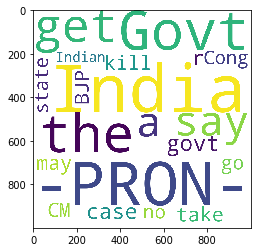

In [15]:


wc = WordCloud(background_color="white",width=1000,height=1000, max_words=20,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(word2count)
plt.imshow(wc)

# ------------------------------------------------------------------------------------------
# Week 6
## Discuss the results


### As we can see, most of the words in the word cloud above relates to the Govermnment news/ political news. The data set included all kinds of news articles but these are the most used words.
###  This means that we do not get to see other news unless we explicitly look for it. This is an example of only one source of media i.e Newspaper(The Hindu). From this we can draw the conclusion that political news drive the newspaper media.

# ------------------------------------------------------------------------------------------
# Week 7
## Recommendations


The data above shows that we have been looking at biased news reports. It is high time that we shift towards verified and unbiased news sources. We would have to visualise data for each news company/source to have a better understanding about which news source is better.

# ------------------------------------------------------------------------------------------

# Week 8 
## Directions for Future Study/limitations of data analysis

As mentioned in the recommendations, to understand this clearly, we would have to study a lot of datasets from various news sources to come to a logical conclusion.